In [193]:
from google.colab import files
uploaded=files.upload()

Saving teleCust.csv.csv to teleCust.csv (1).csv


In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
path = "/content/drive/MyDrive/Acmegrade/Datasets /teleCust.csv"

In [197]:
df=pd.read_csv(path)

In [198]:
df.shape

(1000, 12)

In [199]:
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27,3,0,0,1,3,1
996,1,7,34,0,2,22,5,5,0,1,1,1
997,3,67,59,0,40,944,5,33,0,1,1,4
998,3,70,49,0,18,87,2,22,0,1,1,3


<BarContainer object of 1000 artists>

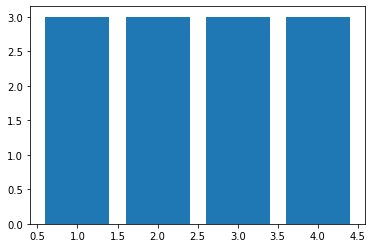

In [200]:
plt.bar(df['custcat'],df['region'])

<BarContainer object of 1000 artists>

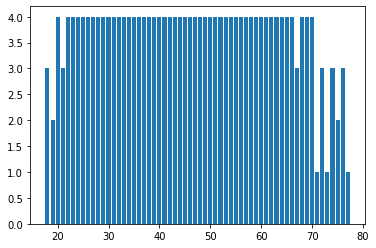

In [201]:
plt.bar(df['age'],df['custcat'])

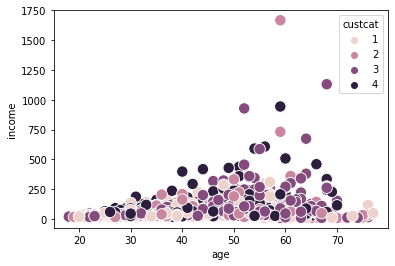

In [202]:
import seaborn as sns
sns.scatterplot(x=df["age"],y=df["income"], hue=df["custcat"],s=130)

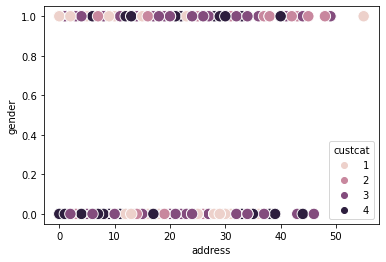

In [203]:
import seaborn as sns
sns.scatterplot(x=df["address"],y=df["gender"], hue=df["custcat"],s=130)

In [248]:
df[0:10]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3
5,2,41,39,0,17,78,2,16,0,1,1,3
6,3,45,22,1,2,19,2,4,0,1,5,2
7,2,38,35,0,5,76,2,10,0,0,3,4
8,3,45,59,1,7,166,4,31,0,0,5,3
9,1,68,41,1,21,72,1,22,0,0,3,2


In [268]:
X= df[["region","marital","ed","age" ]]

In [269]:
#X=X.values
X=np.asarray(X)

In [270]:
X

array([[ 2,  1,  4, 44],
       [ 3,  1,  5, 33],
       [ 3,  1,  1, 52],
       ...,
       [ 3,  0,  5, 59],
       [ 3,  0,  2, 49],
       [ 3,  1,  3, 36]])

In [271]:
X.dtype

dtype('int64')

In [272]:
Y=df["custcat"]

In [273]:
Y

0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64

In [274]:
Y=np.asarray(Y)

In [275]:
Y.dtype

dtype('int64')

In [276]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (700, 4) (700,)
Test set: (300, 4) (300,)


In [277]:
#Create a model

In [278]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf=clf.fit(X_train,Y_train)

In [279]:
print(clf)

KNeighborsClassifier()


In [280]:
X_test[0:5]

array([[ 1,  1,  2, 30],
       [ 1,  0,  2, 40],
       [ 1,  1,  4, 61],
       [ 1,  1,  4, 31],
       [ 1,  1,  5, 29]])

In [281]:
X_test

array([[ 1,  1,  2, 30],
       [ 1,  0,  2, 40],
       [ 1,  1,  4, 61],
       ...,
       [ 3,  0,  1, 49],
       [ 3,  0,  3, 39],
       [ 2,  1,  2, 34]])

In [282]:
# Actual Values
Y_test[0:5]

array([4, 1, 1, 2, 4])

In [283]:
Y_pred=clf.predict(X_test)

In [284]:
# Predicted Values
Y_pred[0:5]

array([1, 3, 3, 4, 4])

In [285]:
Y_pred

array([1, 3, 3, 4, 4, 4, 1, 1, 2, 1, 3, 3, 3, 4, 2, 1, 4, 4, 4, 4, 2, 1,
       2, 2, 2, 4, 1, 1, 4, 1, 3, 1, 4, 3, 1, 3, 2, 2, 2, 4, 2, 4, 1, 2,
       4, 2, 3, 1, 4, 3, 2, 2, 1, 3, 3, 3, 2, 1, 4, 1, 3, 1, 2, 2, 3, 3,
       3, 3, 1, 1, 1, 3, 2, 3, 1, 1, 4, 1, 1, 3, 4, 1, 1, 1, 4, 1, 3, 2,
       2, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 3, 3, 1, 4, 2, 1, 1, 4,
       3, 1, 3, 2, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 4, 1, 3, 1, 1, 1,
       3, 3, 3, 4, 4, 4, 1, 3, 1, 3, 3, 3, 4, 1, 4, 1, 1, 2, 2, 1, 3, 2,
       1, 3, 1, 3, 4, 3, 4, 3, 1, 2, 2, 4, 1, 3, 3, 2, 1, 4, 2, 3, 2, 1,
       2, 1, 2, 1, 3, 1, 3, 3, 3, 3, 1, 1, 4, 1, 3, 2, 4, 1, 1, 4, 3, 1,
       2, 1, 4, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 4, 1, 3, 2, 1, 1,
       4, 3, 1, 4, 4, 1, 1, 2, 1, 1, 4, 4, 3, 3, 4, 4, 3, 3, 1, 1, 3, 4,
       1, 1, 1, 2, 4, 1, 2, 1, 4, 3, 4, 4, 1, 2, 2, 3, 4, 2, 1, 3, 2, 1,
       1, 2, 1, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 2, 1, 4,
       1, 3, 3, 1, 2, 1, 1, 3, 3, 1, 3, 1, 4, 2])

In [286]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='weighted') 

0.32170143984946625

In [223]:
#Training Accuracy
from sklearn.metrics import accuracy_score
#print(accuracy_score(Y_train, Y_pred))

In [224]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[41  9 22  9]
 [17 13 14 13]
 [37 15 25  9]
 [25 26 11 14]]


In [225]:
Y_pred.shape

(300,)

In [226]:
Y_test.shape

(300,)

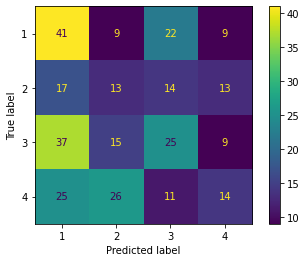

In [227]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)